# British Airways Customer Reviews Data Analysis

**Author:** Lester Liam  | [GitHub](https://github.com/lester-liam) | [LinkedIn](https://www.linkedin.com/in/lester-liam) <br/>
**Last Updated:** 27 February 2025
<br/>

> Generated Datasets can be found here in [Google Drive](https://drive.google.com/drive/folders/16VPHZBDPZUUnRndVtKLxfd1Px2CfUMhI?usp=drive_link)

This notebook is part of my project for the virtual experience learning on [Forage](https://www.theforage.com/simulations/british-airways/data-science-yqoz). It explores airline reviews data from (Skytrax | https://airlinequality.com) that was scraped in a previous Colab Notebook which can be found [here](https://colab.research.google.com/drive/1cQ_53GyXsGPfi5YsvyQO7mbEVhIVz3YU?usp=sharing)



### Additional References:
1. External Sentiment Analaysis Classifier Model
> [distilbert-base-uncased-US_Airline_Twitter_Sentiment_Analysis by DunnBC22](https://huggingface.co/DunnBC22/distilbert-base-uncased-US_Airline_Twitter_Sentiment_Analysis)

<hr/>

# Table of Contents

>[Load Dataset](#scrollTo=wpQKEYbUGzWK)

>>[Preprocess Text](#scrollTo=3iW5_53PHAor)

>>[Pre-Trained Model for Sentiment Analysis](#scrollTo=55ZdavPNHTjS)

>>>[Export Preprocessed Dataset](#scrollTo=TtOz_3J9Jv2s)

>[Exploratory Data Analysis](#scrollTo=vfz1fvIIcEUs)

>>[Comparison 2023 and 2024 Recommendation Rates](#scrollTo=b-yvChQUJ98K)

>>[Average Ratings By Metrics 2023-2024](#scrollTo=m5ydAIsrKG2i)

>[Top Trip Rating Value](#scrollTo=KnWuXb6AKijS)

>[World Cloud on Review Body](#scrollTo=lwXb9RgDLIuz)

>[Conclusion](#scrollTo=s6jvK7kbLiC7)



In [ ]:
# !pip install nltk
# !pip install -U kaleido

In [ ]:
# NLTK Import & Downloads
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

In [ ]:
# Import Common Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
set(stopwords.words('english'))

from wordcloud import WordCloud, STOPWORDS

import plotly.graph_objects as go
import kaleido # To Export Plotly Graph

from transformers import pipeline

# Load Dataset

In [ ]:
# Read CSV File
reviews_df = pd.read_csv('/content/british_airways_reviews_02_2025.csv')

In [ ]:
reviews_df.head()

,ratingValue,title,body,tripVerified,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity
0,3,"""not use British Airways on this route""",Prior to boarding a gate agent seemed to pi...,Verified,A320,1.0,February 2025,NaN,2.0,NaN,no,London Gatwick to Marrakech,4.0,Economy Class,Solo Leisure,2,NaN
1,1,"""they still haven't replied""",I flew from Amsterdam to Las Vegas with a l...,Verified,NaN,3.0,November 2024,3.0,1.0,3.0,no,Amsterdam to Las Vegas via London,3.0,Premium Economy,Business,1,NaN
2,4,“food has really gone downhill”,"First the good news, the club suites are such...",Verified,A350-1000,1.0,February 2025,2.0,3.0,NaN,no,London to Nairobi,4.0,Business Class,Couple Leisure,3,NaN
3,9,"""thoroughly enjoyed this flight""",I have never travelled with British airways...,Verified,A380,5.0,February 2025,5.0,5.0,4.0,yes,Dubai to London Heathrow,4.0,Economy Class,Solo Leisure,5,NaN
4,1,“customer support was terrible”,"Terrible overall, medium service and the flig...",Verified,NaN,2.0,December 2024,1.0,1.0,1.0,no,Zürich to London,2.0,Economy Class,Couple Leisure,1,NaN


In [ ]:
# Dataset Info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ratingValue             1000 non-null   int64  
 1   title                   1000 non-null   object 
 2   body                    1000 non-null   object 
 3   tripVerified            1000 non-null   object 
 4   Aircraft                526 non-null    object 
 5   Cabin Staff Service     902 non-null    float64
 6   Date Flown              1000 non-null   object 
 7   Food & Beverages        778 non-null    float64
 8   Ground Service          943 non-null    float64
 9   Inflight Entertainment  518 non-null    float64
 10  Recommended             1000 non-null   object 
 11  Route                   996 non-null    object 
 12  Seat Comfort            912 non-null    float64
 13  Seat Type               1000 non-null   object 
 14  Type Of Traveller       998 non-null    o

In [ ]:
# Describe Dataset
reviews_df.describe()

,ratingValue,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Seat Comfort,Value For Money,Wifi & Connectivity
count,1000.000000,902.000000,778.000000,943.000000,518.000000,912.000000,1000.000000,320.000000
mean,3.914000,3.114191,2.624679,2.487805,2.745174,2.713816,2.310000,2.190625
std,3.236832,1.523489,1.469732,1.532247,1.444233,1.384526,1.456029,1.476431
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.000000
75%,7.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Preprocess Text
As the dataset is quite unclean, we'll apply some basic text preprocessing to generate a cleaner string for analysis later in the next section.

In [ ]:
def preprocess_text(x):
  """
  Preprocesses a String by converting to lowercase and
  removing whitespaces, punctuations, and stopwords.

  :x: String to be preprocessed

  Returns: Preprocessed String
  """

  # Convert to Lower Case
  x = str.lower(x)

  # Tokenize String
  words = word_tokenize(x)

  # Remove Whitespaces, Punctuations
  words = [re.sub('\s+', '', word) for word in words]
  words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]

  # Remove less than 2 character strings
  words = [word for word in words if not len(word) <= 2]

  # Remove blank words due to preprocessing
  words = [str for str in words if str]

  # Remove Stopwords
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]

  # Form New Cleaned Sentence
  x = ""
  for i in range(0, len(words)):
    if (i <= len(words) - 1):
      x += words[i] + ' '
    else:
      x += words[i]

  return(x)

print(preprocess_text("I'm reviewing the best airline"))

reviewing best airline 


## Pre-Trained Model for Sentiment Analysis

With the rise of pretrained models, we do not need to train our own NLP Sentiment Analysis Models. The model below is a sentiment analysis trained on US Airline Twitter Dataset.

**Note:** While I applied this method as a quick way to classify, it's important to note that in the real world, it's important to evaluate the model first as it could be inaccurate on real-world datasets and applications. Given the dataset is small, it is much easier to do a quick classification by the model to do rough comparison.

In [ ]:
classifier = pipeline("text-classification", model="DunnBC22/distilbert-base-uncased-US_Airline_Twitter_Sentiment_Analysis")

config.json:   0%|          | 0.00/769 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
reviews_df['title_cleaned'] = reviews_df['title'].apply(preprocess_text)
reviews_df['body_cleaned'] = reviews_df['body'].apply(preprocess_text)
reviews_df.head()

,ratingValue,title,body,tripVerified,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity,title_cleaned,body_cleaned
0,3,"""not use British Airways on this route""",Prior to boarding a gate agent seemed to pi...,Verified,A320,1.0,February 2025,NaN,2.0,NaN,no,London Gatwick to Marrakech,4.0,Economy Class,Solo Leisure,2,NaN,use british airways route,prior boarding gate agent seemed pick elderly ...
1,1,"""they still haven't replied""",I flew from Amsterdam to Las Vegas with a l...,Verified,NaN,3.0,November 2024,3.0,1.0,3.0,no,Amsterdam to Las Vegas via London,3.0,Premium Economy,Business,1,NaN,still replied,flew amsterdam las vegas layover heathrow nove...
2,4,“food has really gone downhill”,"First the good news, the club suites are such...",Verified,A350-1000,1.0,February 2025,2.0,3.0,NaN,no,London to Nairobi,4.0,Business Class,Couple Leisure,3,NaN,food really gone downhill,first good news club suites huge improvement o...
3,9,"""thoroughly enjoyed this flight""",I have never travelled with British airways...,Verified,A380,5.0,February 2025,5.0,5.0,4.0,yes,Dubai to London Heathrow,4.0,Economy Class,Solo Leisure,5,NaN,thoroughly enjoyed flight,never travelled british airways first time cho...
4,1,“customer support was terrible”,"Terrible overall, medium service and the flig...",Verified,NaN,2.0,December 2024,1.0,1.0,1.0,no,Zürich to London,2.0,Economy Class,Couple Leisure,1,NaN,customer support terrible,terrible overall medium service flight delayed...


In [ ]:
review_body = pd.Series(reviews_df['body_cleaned']).to_list()

predictions_label_score = {'label': [], 'score': []}

for review in review_body:
  prediction:dict = classifier(review)[0]

  label = prediction.get('label')
  score = round(prediction.get('score') * 100, 4)

  if label == 'LABEL_0':
    label = 'Negative'
  elif label == 'LABEL_1':
    label = 'Neutral'
  else:
    label = 'Positive'

  predictions_label_score['label'].append(label)
  predictions_label_score['score'].append(score)

predictions_df = pd.DataFrame(predictions_label_score)
predictions_df.head()

,label,score
0,Negative,99.0259
1,Negative,99.0935
2,Negative,97.1161
3,Positive,50.4370
4,Negative,99.1808


In [ ]:
# Merge Sentiment Predictions with Main DataFrame
reviews_df = pd.concat([reviews_df, predictions_df], axis=1)
reviews_df.head()

,ratingValue,title,body,tripVerified,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,...,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity,title_cleaned,body_cleaned,label,score
0,3,"""not use British Airways on this route""",Prior to boarding a gate agent seemed to pi...,Verified,A320,1.0,February 2025,NaN,2.0,NaN,...,London Gatwick to Marrakech,4.0,Economy Class,Solo Leisure,2,NaN,use british airways route,prior boarding gate agent seemed pick elderly ...,Negative,99.0259
1,1,"""they still haven't replied""",I flew from Amsterdam to Las Vegas with a l...,Verified,NaN,3.0,November 2024,3.0,1.0,3.0,...,Amsterdam to Las Vegas via London,3.0,Premium Economy,Business,1,NaN,still replied,flew amsterdam las vegas layover heathrow nove...,Negative,99.0935
2,4,“food has really gone downhill”,"First the good news, the club suites are such...",Verified,A350-1000,1.0,February 2025,2.0,3.0,NaN,...,London to Nairobi,4.0,Business Class,Couple Leisure,3,NaN,food really gone downhill,first good news club suites huge improvement o...,Negative,97.1161
3,9,"""thoroughly enjoyed this flight""",I have never travelled with British airways...,Verified,A380,5.0,February 2025,5.0,5.0,4.0,...,Dubai to London Heathrow,4.0,Economy Class,Solo Leisure,5,NaN,thoroughly enjoyed flight,never travelled british airways first time cho...,Positive,50.4370
4,1,“customer support was terrible”,"Terrible overall, medium service and the flig...",Verified,NaN,2.0,December 2024,1.0,1.0,1.0,...,Zürich to London,2.0,Economy Class,Couple Leisure,1,NaN,customer support terrible,terrible overall medium service flight delayed...,Negative,99.1808


### Export Preprocessed Dataset

In [ ]:
# Export to CSV (for safekeeping)
reviews_df.to_csv('british_airways_reviews_02_2025_sentiment.csv', index=False)

<hr/>

# Exploratory Data Analysis

In [ ]:
# Read New Dataset
reviews_df = pd.read_csv('/content/british_airways_reviews_02_2025_sentiment.csv')

# Remove Unused Columns
del reviews_df['title']
del reviews_df['body']

reviews_df.head(3)

,ratingValue,tripVerified,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity,title_cleaned,body_cleaned,label,score
0,3,Verified,A320,1.0,February 2025,NaN,2.0,NaN,no,London Gatwick to Marrakech,4.0,Economy Class,Solo Leisure,2,NaN,use british airways route,prior boarding gate agent seemed pick elderly ...,Negative,99.0259
1,1,Verified,NaN,3.0,November 2024,3.0,1.0,3.0,no,Amsterdam to Las Vegas via London,3.0,Premium Economy,Business,1,NaN,still replied,flew amsterdam las vegas layover heathrow nove...,Negative,99.0935
2,4,Verified,A350-1000,1.0,February 2025,2.0,3.0,NaN,no,London to Nairobi,4.0,Business Class,Couple Leisure,3,NaN,food really gone downhill,first good news club suites huge improvement o...,Negative,97.1161


In [ ]:
# Retrieve Verified Reviews Only
reviews_df = reviews_df[reviews_df['tripVerified'] == "Verified"]

# Retrieve 2023-2024 Reviews for Latest Analysis
reviews2024_df = reviews_df[reviews_df['Date Flown'].str.contains('2024')]
reviews2023_df = reviews_df[reviews_df['Date Flown'].str.contains('2023')]

print("Number of Reviews (2023):", reviews2023_df.shape[0])
print("Number of Reviews (2024):", reviews2024_df.shape[0])

Number of Reviews (2023): 212
Number of Reviews (2024): 119


## Comparison 2023 and 2024 Recommendation Rates

Each review has a Recommend / Not Recommend. In this section, we'll compare last year % of passengers that recommend British Airways against this year.

In [ ]:
# 2024 Statistics
numReviews2024 = reviews2024_df.shape[0]
numRecommends2024 = reviews2024_df[reviews2024_df['Recommended'] == 'yes'].shape[0]
percentRecommend2024 = round((numRecommends2024 / numReviews2024) * 100, 2)

# 2023 Statistics
numReviews2023 = reviews2023_df.shape[0]
numRecommends2023 = reviews2023_df[reviews2023_df['Recommended'] == 'yes'].shape[0]
percentRecommend2023 = round((numRecommends2023 / numReviews2023) * 100, 2)

fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = percentRecommend2024,
    mode = "gauge+number+delta",
    delta = {'reference': percentRecommend2023},
    title = {'text': "British Airways Customer's Recommendation Rate: 2024 vs. 2023"},
    gauge = {'axis': {'range': [0, 100]},
             'steps' : [
                 {'range': [0, 20], 'color': "darkred"},
                 {'range': [20, 40], 'color': "red"},
                 {'range': [40, 60], 'color': "yellow"},
                 {'range': [60, 80], 'color': "lightseagreen"},
                 {'range': [80, 100], 'color': "green"}],
             'bar': {'color': 'salmon'}
             }))

fig.show()

In [ ]:
# Export Gauage Plot (kaleido package required!)
fig.write_image("gauge_plot.png")

## Average Ratings By Metrics 2023-2024

Each review has various different metrics they rate on a scale of 1 to 5 (stars). We compared the average ratings from last year against this year.

In [ ]:
# Average Ratings by Each Metrics
metrics = [
 'Cabin Staff Service',
 'Food & Beverages',
 'Ground Service',
 'Inflight Entertainment',
 'Seat Comfort',
 'Value For Money',
 'Wifi & Connectivity'
]

# 2024 Key Metrics
key_metrics2024 = reviews2024_df[metrics].mean().round(2).reset_index()
key_metrics2024.columns = ['Metric', 'Average Rating']
key_metrics2024 = key_metrics2024.sort_values(by='Average Rating', ascending=True).reset_index(drop=True)
key_metrics2024

,Metric,Average Rating
0,Value For Money,2.17
1,Ground Service,2.22
2,Wifi & Connectivity,2.26
3,Food & Beverages,2.41
4,Seat Comfort,2.66
5,Inflight Entertainment,2.70
6,Cabin Staff Service,2.77


In [ ]:
# 2023 Key Metrics
key_metrics2023 = reviews2023_df[metrics].mean().round(2).reset_index()
key_metrics2023.columns = ['Metric', 'Average Rating']
key_metrics2023 = key_metrics2023.sort_values(by='Average Rating', ascending=True).reset_index(drop=True)
key_metrics2023

,Metric,Average Rating
0,Wifi & Connectivity,1.92
1,Value For Money,2.15
2,Ground Service,2.34
3,Food & Beverages,2.48
4,Seat Comfort,2.50
5,Inflight Entertainment,2.51
6,Cabin Staff Service,2.99


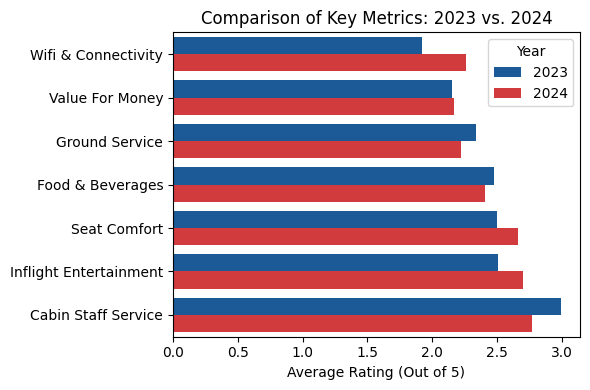

In [ ]:
# Plot Bar Chart Comparing 2024 Key Metrics Against 2023
# Combine 2023 and 2024 data for plotting
key_metrics2023['Year'] = 2023
key_metrics2024['Year'] = 2024
combined_metrics = pd.concat([key_metrics2023, key_metrics2024])

# Create the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(y='Metric', x='Average Rating', hue='Year',\
            data=combined_metrics, palette={2023: "#075AAA", 2024: "#EB2226"})
plt.title('Comparison of Key Metrics: 2023 vs. 2024')
plt.xlabel('Average Rating (Out of 5)')
plt.ylabel(None)
plt.tight_layout()
plt.show()


# Top Trip Rating Value

Each review has a overall rating and type of traveller (Family, Business, Couple, Solo) on a scale of 1 to 10. We've extracted all the ratings from 2023 to 2024 to show if there's any significant changes between each traveller type and their overall satisfaction score.

In [ ]:
# Extract Trip Satisfaction (rating) Score
trips2023_df = reviews2023_df[['Type Of Traveller', 'ratingValue']].copy()
trips2023_df['Year'] = 2023

trips2024_df = reviews2024_df[['Type Of Traveller', 'ratingValue']].copy()
trips2024_df['Year'] = 2024

In [ ]:
print("2023 Trip Satisfaction Score:")
print(trips2023_df[0:3])
print("-----\n")

print("2024 Trip Satisfaction Score:")
print(trips2024_df[0:3])

2023 Trip Satisfaction Score:
    Type Of Traveller  ratingValue  Year
11     Family Leisure            1  2023
115          Business            1  2023
121    Family Leisure            3  2023
-----

2024 Trip Satisfaction Score:
  Type Of Traveller  ratingValue  Year
1          Business            1  2024
4    Couple Leisure            1  2024
8      Solo Leisure            1  2024


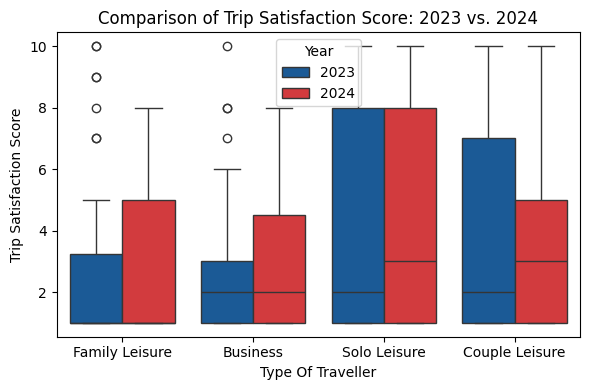

In [ ]:
combined_trips = pd.concat([trips2023_df, trips2024_df])

plt.figure(figsize=(6, 4))
sns.boxplot(x='Type Of Traveller', y='ratingValue', hue='Year', data=combined_trips, palette={2023: "#075AAA", 2024: "#EB2226"})
plt.title('Comparison of Trip Satisfaction Score: 2023 vs. 2024')
plt.xlabel('Type Of Traveller')
plt.ylabel('Trip Satisfaction Score')
plt.tight_layout()
plt.show()

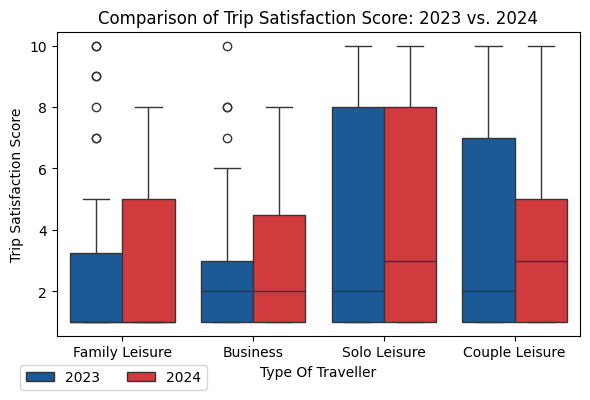

In [ ]:
# (Same) but Move Legend to Bottom of Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Type Of Traveller', y='ratingValue', hue='Year', data=combined_trips, palette={2023: "#075AAA", 2024: "#EB2226"})
plt.title('Comparison of Trip Satisfaction Score: 2023 vs. 2024')
plt.xlabel('Type Of Traveller')
plt.ylabel('Trip Satisfaction Score')
plt.tight_layout()

# Move legend to the bottom
plt.legend(loc='lower right', bbox_to_anchor=(0.3, -0.2), ncol=2)
plt.show()

# World Cloud on Review Body

In this section, we explore various wordclouds on positive, negaive and combined reviews

Length:  61603


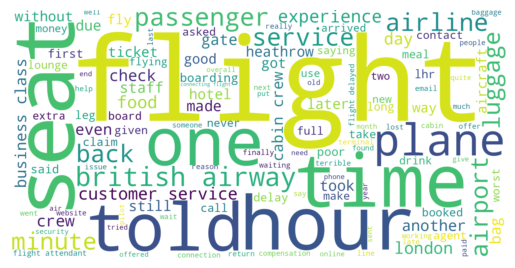

In [ ]:
"""Negative Reviews WordCloud"""

# Extract All Negative Reviews
negReviews = reviews2024_df[
                (reviews2024_df['label'] == 'Negative') &
                (reviews2024_df['score'] >= 90)]['body_cleaned']\
                .tolist()
negReviews = ' '.join(negReviews)
print("Length: ", len(negReviews))

# WordCloud for All Positive & Negative Reviews
wordcloud = WordCloud(
                width=2000,
                height=1000,
                background_color='white',
                stopwords=STOPWORDS,
                min_font_size=20).generate(negReviews)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Length:  4493


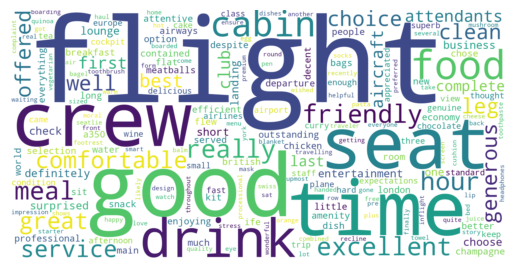

In [ ]:
"""Positive Reviews WordCloud"""

# Extract All Positive Reviews
posReviews = reviews2024_df[
                (reviews2024_df['label'] == 'Positive') &
                (reviews2024_df['score'] >= 90)]['body_cleaned']\
                .tolist()
posReviews = ' '.join(posReviews)
print("Length: ", len(posReviews))

# Generate WordCloud
wordcloud = WordCloud(
                width=2000,
                height=1000,
                background_color='white',
                stopwords=STOPWORDS,
                min_font_size=20).generate(posReviews)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

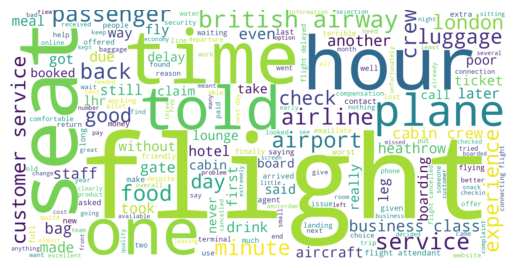

In [ ]:
"""All Reviews WordCloud"""

# Merge Positive & Reviews
allReviews = posReviews + negReviews

# WordCloud for All Positive & Negative Reviews
wordcloud = WordCloud(
                width=2000,
                height=1000,
                background_color='white',
                stopwords=STOPWORDS,
                min_font_size=20).generate(allReviews)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Negative WordCloud Cleaning
BoW = word_tokenize(negReviews)

# Remove Words less than or equal 3 characters
BoW = [word for word in BoW if len(word) > 3]

# Remove Stopwords
stop_words = set(stopwords.words('english'))
BoW = [word for word in BoW if word not in stop_words]

# Remove Common Words in Top 25 that don't contribute meaning
common_words = ["british", "airways", "would", "told", "even", "could"]
BoW = [word for word in BoW if word not in common_words]
word, count = np.unique(BoW, return_counts=True)

word_count_df = pd.DataFrame({'word': word, 'count': count})
word_count_df = word_count_df.sort_values(by='count', ascending=False).reset_index(drop=True)
print(word_count_df.head(25))

          word  count
0       flight    235
1      service     71
2         crew     57
3         seat     52
4         time     52
5        hours     46
6     customer     45
7      luggage     42
8        plane     42
9         back     40
10     airport     39
11       seats     39
12       cabin     39
13       class     39
14    business     38
15  experience     37
16       staff     36
17        food     35
18       check     35
19      london     33
20     minutes     33
21  passengers     32
22        hour     29
23     airline     29
24     another     28


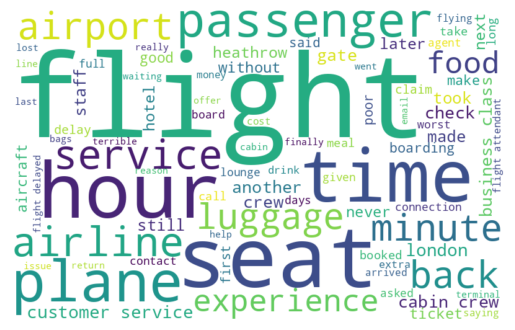

In [ ]:
# Recreate Word Cloud
negReviewsCleaned = ' '.join(BoW)
wordcloud = WordCloud(
                width=800,
                height=500,
                background_color='white',
                stopwords=STOPWORDS,
                max_words=100,
                min_font_size=15).generate(negReviewsCleaned)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Conclusion
* 28.6% of Passengers them wound British Airway, up by 1.2% compared to last year
* Negative Reviews frequently mentioned terms like:
“flight”, “service”, “seat”, “plane”  and “time”
* Cabin Staff Service remains as Best Performing Metric despite falling compared to 2023
* Rating for Wifi & Connectivity, Seat Comfort & Inflight Entertainment increased
* Solo Leisure Travellers remained most satisfied with the highest average trip score
* Family Leisure, Business Travellers trip scores improved while Couple Leisure fell



